In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from datetime import datetime as dt

## Introduction

Les gestions indicielle et benchamrkée sont deux types de gestions très utilisés. A la base, ces deux types de gestions étaient exclusivement utilisés par les fonds traditionnels mais depuis l'emergence de nouveaux indices associés aux marchés des produits alternatifs, les fonds spécialisés s'y sont aussi mis.

<u> Exemple</u>: 

SCPI société civile de placement immobilier, un fonds immobiliers dans lequel les investisseur au même titre qu'un actionnaire d'entreprise obtient une part du capital du fonds et par le meme temps le droit de toucher des revenus réguliers associés au performances du fonds basé sur les revenus locatifs (dividendes) et qui peut beneficier de l'appreciation de la valeur liquidative en revandant ces parts.

<u> Definitions</u>: 

La gestion indicielle est un type de gestion dit passive. Son objectif n'est pas de battre l'indice mais de répliquer ses performances. En revanche, une gestion benchmarkée est une gestion active où l'objectif du fonds sera de battre son indice de référence, de le surperformer.

## Tracking Error

### Definitions

Le tracking error est une mesure de risque relatif utilisé par les gestionnaires indiciels et benchmarkés. Il correspond à la volatilité des rendements relatifs c'est à dire à l'ecart-type de la différence de rendements entre le fonds et son indice de référence.

On distingue deux utilisations du tracking error:
- Tracking Error Ex-ante

Permet d'anticiper le risque que prend le gérant par rapport à son benchmark. Il mesure ainsi le risque de "décrocher" de son bench.

Un gérant qui décide de ne pas adopter fidèlement l'allocation de son bench aura toujours une tracking error anticipée stricitement positive. Or, cette strict positivité du tracking error ex-ante n'indique en rien celle du ex-post.

- Tracking Error Ex-post

En effet, le tracking error ex-post mesure le risque relatif réalisé par le fonds par rapport à son benchmark. Ainsi, il est tout à fait possible d'avoir une tracking error ex-ante strictement positive et une tracking error ex-post nulle voir quasi-nul dans le cas où le rendement du fonds serait toujours au-dessus de son benchmark à un certain niveau quasi-constant.

Ainsi, on peut comprendre que le gérant idéal sera celui qui générera un rendement excédentaire maximal pour une tracking error ex-post minimale (par exemple, un gérant qui aura été capable de maintenir constamment les performances de son fonds à 2% au dessus de son benchmark).

On utilise la tracking error ex-ante comme predicteur de la tracking error ex-post.

### Tracking Error, corrélation et Bêta

Ces trois notions sont complétement différentes et à ne pas confondre dans le contexte de la gestion indicielle.

La corrélation, représentée par le coefficient de corrélation $R^2$, représente une mesure de précision de la relation linéaire qui existe entre le portefeuille et son indice référence. Plus le coefficient de corrélation sera grand et plus les variations du bench pourront expliquer ceux du portefeuille. Par exemple, un coefficient de corrélation de 0.5 indique que dans un modèle linéaire, les variations du benchmark pourra expliquer 50% des mouvements futurs du portefeuilles (On se place dans un contexte où le coefficient de corrélation entre le bench et le portefeuille serait quasi-constant). Elle mesure l'exposition au risque systèmatique du portefeuille et permet d'en déduire l'exposition au risque spécifique.

Le beta lui correspond à la pente de la droite de regression qui modélise la relation entre les rendements du portefeuille et ceux du fonds. Il mesure la sensibilité du portefeuille par rapport à son indice.
Dans le cas d'une corrélation linéaire positive parfaite entre le portefeuille et son benchmark, si le beta est de 0.5 et que le cours de l'indice augmente d'1% alors le cours du portefeuille augmentera de 0.5%.

Le tracking error lui correspond comme on l'a dit plus haut à la volatilité de la différence des rendements entre le portefeuille et son benchmark. Il est assez simple de voir qu'il peut être exprimé en fonction du $\beta$ et de $\rho$.

#### Cas n = 2

$$
T^2 = \sigma^2(R_p - R_b) = E((R_p-R_b)^2) - E(R_p-R_b)^2 = \sigma^2(R_p) + \sigma^2(R_b) - 2 \cdot cov(R_p, R_b) \\
\Leftrightarrow T^2 = \sigma^2(R_p) + \sigma^2(R_b) - 2 \cdot \rho \cdot \sigma(R_p) \cdot \sigma(R_b) \qquad (1) \\
\Leftrightarrow T^2 = \sigma^2(R_p) + \sigma^2(R_b) \cdot ( 1 - \beta)
$$

On reconnait la loi du cosinus qui indique que dans un triangle quelconque dont les arrêtes sont de longueurs respectives (a, b, c) et dont l'angle formé par $(\vec{b},\vec{c}) = \theta $:

$$
a^2 = b^2 + c^2 - 2 \cdot b \cdot c \cdot cos(\theta)
$$

On aurait ainsi:

- a : Tracking error
- b : variance des rendements du portefeuille
- c : variance des rendements du benchmark
- cos($\theta$) : coefficient de corrélation

Le tracking error est exprimé en fonction du risque du portefeuille, du risque du benchmark et du coefficient de corrélation entre les rentabilités du portefeuille et du bench.

De plus le recours au modèle du marché de Sharpe, qui postule que le rendement d'un portefeuille peut-être exprimé en fonction de son risque systèmatique $\beta \sigma_b$, de son risque spécifique $\sigma_{\epsilon p}$ (dans le cas d'une corrélation positive imparfaite) et d'un $\alpha_p$ qui correspond au rendement généré indépendament des variations du marché (systèmatique) ou du risque spécifique.

PS: Le risque spécifique est considéré comme inexistant dans le cas d'un portefeuille diversifié.

<u> Modèle de Sharpe </u>:

$$
R_p = \alpha_p + \beta R_b + \epsilon_p \\
\Leftrightarrow T^2 = (\beta - 1)^2 \cdot \sigma^2_b + \sigma^2_\epsilon \qquad (2)
$$

L'expression (1) nous permet de déduire la strict monotonie du tracking error vis à vis du coefficient de corrélation entre les rentabilités du portefeuille et de l'indice.
Moins le portefeuille est diversifié vis à vis de son indice plus le coefficient de corrélation tend vers 1. Ainsi, dans ce cas, le tracking error est une fonction décroissante du coefficient de corrélation et tend à répliquer fidélement les performances de son benchmark. Ainsi, dans le cas où les volatilités du portefeuille et du benchmarck seraient considérer comme constante alors un coefficient de corrélation strictement positif réduit le risque relatif.

L'expression (2) nous montre que la fonction tracking error n'est pas monotone en volatilité du benchmark.

$$
\frac{\partial{T^2}}{\partial{\sigma_b}} = 2 \cdot (\beta - 1) \cdot \sigma_b
$$

Le tracking error est strictement croissante que si $\beta$ > 1 et décroissante si $\beta \leq 1$

L'espression (1) nous montre aussi que le risque relatif n'est pas monotone en volatilité du portefeuille.

$$
\frac{\partial{T^2}}{\partial{\sigma_p}} = 2 \cdot (\sigma_p - \rho \cdot \sigma_b) \\
avec, \; \rho = \beta \cdot \frac{\sigma_b}{\sigma_p}
$$ 

D'où f est strictement croissante si $\beta < (\frac{\sigma_p}{\sigma_b})^2$

Il va de soit que dans le cadre d'une gestion indicielle, il n'y a pas d'intérêt à considérer une possible corrélation négative. La composition de l'indice et du fonds est la même (ou pratiquement, par exemple dans le cadre d'une gestion active avec suppression d'un actif par surpondération d'un autre).

In [65]:
index_tickers = ["^AEX", "^IXIC", "000300.SS", "^DJI", "^STOXX50E", "^GDAXI", "^N225", "^FTSE", "^FCHI", 
                 "^HSI", "^GSPC"]
benchmark_ticker = "^GSPC"

start = "2018-01-01"
end = "2023-08-01"
df_index, p = pd.DataFrame(), 0
for index in index_tickers:
    data = yf.Ticker(index).history(start=start, end=end).Close
    data.index = pd.to_datetime(data.index).strftime('%d-%m-%Y')
    if p == 0:
        df_index[index] = data
        df_index.index = data.index
        p = 1
    else:
        df_index = pd.merge(df_index, data, left_index=True, right_index=True)
        df_index.columns = list(df_index.columns[:-1]) + [index]

In [66]:
returns = df_index.pct_change().dropna()
returns

,^AEX,^IXIC,000300.SS,^DJI,^STOXX50E,^GDAXI,^N225,^FTSE,^FCHI,^HSI,^GSPC
Date,,,,,,,,,,,
12-03-2021,-0.009215,-0.005882,0.003541,0.009021,-0.003193,-0.004599,0.017328,0.003637,0.002120,-0.021980,0.001015
15-03-2021,0.002052,0.010499,-0.021537,0.005333,-0.000918,-0.002825,0.001654,-0.001745,-0.001750,0.003272,0.006492
16-03-2021,0.007145,0.000881,0.008702,-0.003869,0.005515,0.006649,0.005178,0.007986,0.003224,0.006726,-0.001570
17-03-2021,-0.004300,0.003981,0.004233,0.005770,-0.000317,0.002681,-0.000226,-0.006012,-0.000101,0.000222,0.002879
18-03-2021,0.002468,-0.030242,0.008020,-0.004636,0.004624,0.012257,0.010110,0.002514,0.001316,0.012799,-0.014761
...,...,...,...,...,...,...,...,...,...,...,...
25-07-2023,0.010706,0.006095,0.028881,0.000758,0.001887,0.001275,-0.000564,0.001719,-0.001597,0.041046,0.002815
26-07-2023,-0.005578,-0.001222,-0.002071,0.002315,-0.010282,-0.004943,-0.000434,-0.001937,-0.013537,-0.003564,-0.000155
27-07-2023,0.021407,-0.005462,-0.001193,-0.006684,0.023306,0.017021,0.006821,0.002071,0.020529,0.014148,-0.006425


A partir de ces données, analysons dans le plan risque spécifique/risque systèmatique les sensibilités des différents indices contre le benchmark S&P 500 (^GSPC).

<u> Protocole à suivre </u>:

- Collecte des données de rendements par actifs


- Utilisation du modèle du CAPM (Capital Asset Pricing Model), ou Modèle de Sharpe, pour estimer les rendements générés par leur exposition au risque systèmatique. Le modèle est le suivant:
$$
R_i = \alpha_i + \beta_i \cdot R_b + \epsilon_p \\
\Leftrightarrow \sigma(\epsilon_p) = \sqrt{\sigma^2(R_i) - \beta_p^2 \cdot (1 - 2 \beta_p) \cdot \sigma^2(R_b)}
$$
Notez que dans plusieurs développements théoriques, la composante spécifique est considérée comme nulle et ceci s'explique par le fait que ce risque est diversifiable contrairement au risque systèmatique (marché). Dans le cas des indices, cette approximation peut ne pas être considérée comme valable et nous allons le vérifier juste après quantitativement. En effet, un indice est par construction un portefeuille peu diversifié. On va construire un indice pour réprésenter les tendances d'un marché et non pas pour qu'il soit efficient au sens de Markowitz. Ils sont généralement construit sur une base de critères communs: taille, secteurs, volumes, ... qui limite leur diversification. De plus, leur caractère non tactique avec des rééquilibrages peu fréquent ainsi que les tendances non rationnelles et speculatives prises par le marché ont tendances 


- Calculer les rendements résiduels de chaque actif qui peuvent être théoriquement considéré comme générer par leur exposition à leur risque spécifique. 


- En déduire le risque spécifique de chaque actif (volatilité générée par ces rendements résiduels)

Dans le cadre de ce cas d'application, fixons un taux sans risque à 2,5%, qui correspond à peu près à la moyenne du taux du Bon du trésor américain 10 ans. 

In [67]:
benchmark = returns[benchmark_ticker]
capm_df = pd.DataFrame()
capm_df.index = ["alpha", "beta", "hist_volatility", "systematic risk", "specific risk"]
for stock in returns.columns:
    lm = LinearRegression()
    stock_returns = returns[stock]
    lm.fit(np.array(benchmark).reshape(-1, 1), stock_returns)
    beta = lm.coef_[0]
    alpha = lm.intercept_
    hist_volatility = stock_returns.std()
    systematic_risk = np.sqrt((beta**2) * benchmark.var())
    if round(beta, 1) != 1:
        specific_risk = np.sqrt(stock_returns.var() - (beta**2) * (1 - 2 * beta) * benchmark.var())
    else:
        specific_risk = 0
    capm_df[stock] =  [alpha, beta, hist_volatility, systematic_risk, specific_risk]
capm_df

,^AEX,^IXIC,000300.SS,^DJI,^STOXX50E,^GDAXI,^N225,^FTSE,^FCHI,^HSI,^GSPC
alpha,0.000142,-0.000206,-0.000437,-0.000070,0.000153,0.000109,0.000263,0.000180,0.000299,-0.000676,-1.084202e-19
beta,0.575359,1.249398,0.063055,0.811810,0.603119,0.552685,0.169013,0.338680,0.551464,0.181462,1.000000e+00
hist_volatility,0.011523,0.015814,0.011764,0.010397,0.012730,0.012326,0.012265,0.009265,0.012331,0.016940,1.198402e-02
systematic risk,0.006895,0.014973,0.000756,0.009729,0.007228,0.006623,0.002025,0.004059,0.006609,0.002175,1.198402e-02
specific risk,0.011830,0.024209,0.011743,0.012928,0.013146,0.012512,0.012153,0.008974,0.012512,0.016851,0.000000e+00


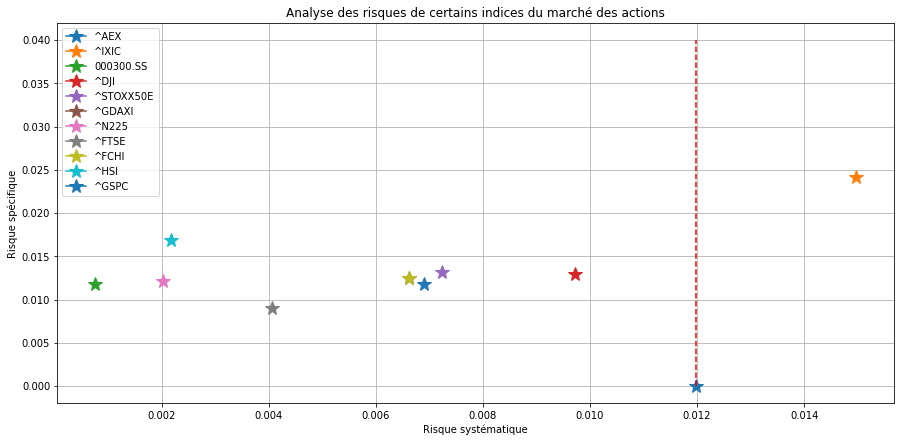

In [68]:
plt.figure(figsize =(15, 7))
for stock in capm_df.columns:
    plt.plot(capm_df.loc["systematic risk", stock], capm_df.loc["specific risk", stock], marker="*", label=f"{stock}", markersize=15)

plt.plot([capm_df.loc["systematic risk", benchmark_ticker]]*2, np.linspace(0, 0.040, 2), linestyle='dashed', color="red")
plt.title("Analyse des risques de certains indices du marché des actions")
plt.xlabel("Risque systématique")
plt.ylabel("Risque spécifique")
plt.grid()
plt.legend()
plt.show()

Le graphe ci-dessus nous permet de visualiser la sensibilités des différents indices des marchés européens et américains vis à vis l'indice du S&P. Pour rappel, nous sommes sur une echelle journaliere dans notre étude.

Notons déjà que l'on peut séparer le cadran en deux par la courbe verticale tracée au niveau de la volatilité du benchmark qui est logiquement pleinement exprimée par son risque systèmatique. Les indices se trouvant à droite ont un beta supérieur à 1 et plus nous nous éloignons à droite et plus l'indice peut être considéré comme hypersensible au mouvement du S&P. Respectivement, plus l'on s'éloigne par la gauche et plus le beta de l'indice est petit et moins il est sensible aux fluctuations du S&P. 

Nos résultats semblent en phase avec notre intuition dans le sens où les indices les plus sensibles sont ceux du marché américains avec notamment une hypersensibilité du Nasdaq composite. Et les moins sensibles, sont les indices du marché asiatiques.

De plus, nous pouvons aisément visualiser le tracking error de chaque indice vis à vis du S&P puisqu'il correspond à la distance entre les deux points. Ainsi, en utilisant un simple Pythagore, on comprend que le tracking error dépend de la poisition du beta par rapport à 1 et du risque spécifique.

Le coefficient de corrélation se déduit de l'angle formé entre la droite qui passe par l'origine et par l'indice, et l'axe des absicsses. Plus l'angle est faible et plus la corrélation est forte.

Plus le beta est loin de 1 et plus le risque spécifique est fort, plus le fonds possède une tracking error ex-ante forte.

### Gestion sous contrainte de Benchmark

La gestion active benchmarkée a pour but de battre l'indice de référence tout en ne s'éloignant pas trop de l'allocation préconisée.

Un gérant actif tente de battre l'indice en appliquant une approche tactique par surpondération d'un (ou plusieurs) actif(s) au détriment d'un (ou plusieurs) autre(s) tout en respectant une contrainte de tracking error. On parle dans le cadre d'une gestion benchmarkée d'une optimisation "relative" contrairement à une approche markowitzienne pour laquelle on préférera utiliser le terme d'approche "absolue".

<u> Optimisation du risque relatif contre optimisation du risque absolu </u>

L'approche absolue de Markowitz permet de dominer le benchmark en obtenant des rendement supérieurs pour un même risque voir un risque plus faible. L'optimisation relative ne permet pas en général de dominer le marché. De plus, la gestion benchmarkée avec optimisation relative nous expose à un risque de benchmark timing avec un beta > 1  (risque d'intensification de la tendance baissière par rapport à celle de l'indice).

#### Dans le cadre de mes applications, j'utiliserai le CAC 40 comme indice de référence.

L'indice du CAC 40 est un indicateur de la santé du marché français dans sa globalité. Il a été introduit en 87 et initialisé à 1000 points.

Cet indice est géré par le conseil scientifique des indices qui est un organisme indépendant qui s'occupe de la construction et du rebalancement des indices du marché français. Pour ce qui est du CAC 40, le conseil se réunit 4 fois par an pour décider d'eventuels rebalancements, sorties ou entrées de valeurs. L'indice du CAC 40 est construit à partir des 100 valeurs à plus grosses capitalisations boursières et les plus liquides pour garantir une certaine diversification.

In [69]:
cac_40_tickers = ["MC.PA", "OR.PA", "RMS.PA", "TTE.PA", "SAN.PA", "AIR.PA", "SU.PA", "AI.PA", "EL.PA", "BNP.PA",
                  "CS.PA", "SAF.PA", "KER.PA", "DG.PA", "STLAP.PA", "RI.PA", "DSY.PA", "STMPA.PA", "BN.PA", "ENGI.PA", 
                  "ACA.PA", "SGO.PA", "CAP.PA", "HO.PA", "ORA.PA", "MT.AS", "LR.PA", "GLE.PA", "ML.PA", "VIE.PA",
                  "PUB.PA", "EDEN.PA", "CA.PA", "EN.PA", "RNO.PA", "ERF.PA", "ALO.PA", "WLN.PA", "TEP.PA", "URW.PA"]
cac_40_weights = [0.1662, 0.0901, 0.0838, 0.06, 0.0520, 0.0432, 0.0377, 0.0359, 0.0332, 0.0305, 0.0264, 0.0261,
                  0.0254, 0.0254, 0.0222, 0.0206, 0.0201, 0.0163, 0.0151, 0.0150, 0.0145, 0.0125, 0.0119, 0.0117, 
                  0.0114, 0.0104, 0.01, 0.0088, 0.0085, 0.0084, 0.0076, 0.0061, 0.0057, 0.005, 0.0045, 0.0045,
                 0.0041, 0.0035, 0.0031, 0.0027]
cac_40_eq_weights = [1/len(cac_40_tickers) for _ in cac_40_tickers]

In [70]:
start = "2023-04-20"
end = "2023-08-20"
tickers_data = yf.download(cac_40_tickers, start=start, end=end).Close
tickers_data.index = pd.to_datetime(tickers_data.index, format = '%Y/%m/%d').strftime('%Y-%m-%d')

[*********************100%***********************]  40 of 40 completed


In [71]:
tickers_returns = tickers_data.pct_change().dropna()

In [72]:
tickers_returns

,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SAN.PA,SGO.PA,STLAP.PA,STMPA.PA,SU.PA,TEP.PA,TTE.PA,URW.PA,VIE.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-20,-0.008561,0.003697,-0.015161,-0.003217,0.001003,-0.003229,-0.006755,0.009040,-0.000512,-0.000363,...,0.013596,-0.000974,-0.006354,-0.003689,-0.000655,-0.017233,0.002084,-0.005508,0.011004,0.007026
2023-04-23,0.008268,0.002333,0.007226,-0.000922,0.004176,0.008183,0.002992,-0.002780,0.001879,0.007437,...,-0.000583,-0.002339,-0.063072,-0.018630,0.004194,0.005358,0.008839,-0.008410,-0.004762,-0.004651
2023-04-24,-0.014942,0.000000,-0.018247,0.020305,0.005490,-0.023842,0.000271,-0.003098,-0.001194,-0.021426,...,0.017506,-0.009769,-0.012045,-0.012263,0.017489,-0.013081,-0.009620,0.003724,-0.014354,-0.008567
2023-04-25,0.009804,-0.015311,-0.014456,-0.000452,-0.001489,-0.002079,0.021150,0.002486,-0.000512,0.025207,...,-0.020264,-0.004538,-0.006909,0.009908,-0.025654,-0.140157,0.013010,0.023495,-0.006241,0.010736
2023-04-26,0.012640,0.009952,0.011767,0.008597,-0.014747,0.019615,0.002390,0.009609,0.006320,-0.002692,...,-0.006634,0.012686,0.005729,-0.087234,0.038968,0.031687,-0.026199,-0.033025,0.000349,0.012435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-13,0.002597,0.007054,-0.000765,0.001541,0.006969,0.002183,0.001104,0.000000,0.004131,-0.001158,...,0.005563,0.001312,0.002849,0.008805,0.004393,0.003335,-0.010320,0.001401,0.003206,0.002785
2023-08-14,-0.007081,-0.007250,-0.013013,-0.007692,-0.018394,-0.015080,-0.007718,-0.011664,-0.015024,-0.006958,...,-0.006967,-0.006058,-0.020478,-0.006546,-0.010622,-0.023681,-0.008484,-0.019792,-0.014915,-0.014810
2023-08-15,-0.005566,-0.000124,-0.002017,-0.011628,-0.003154,-0.005104,0.003889,-0.000311,-0.004540,-0.003503,...,-0.006190,0.003459,0.006405,-0.003121,0.000126,-0.013192,0.003922,-0.000204,0.006128,-0.001566


In [73]:
bench_returns = pd.DataFrame()
fund_returns = pd.DataFrame()
for ticker, cac_weight, cac_eq_weight in zip(cac_40_tickers, cac_40_weights, cac_40_eq_weights):
    bench_returns[ticker] = cac_weight * tickers_returns[ticker]
    fund_returns[ticker] = cac_eq_weight * tickers_returns[ticker]
bench_returns.index = tickers_returns.index
fund_returns.index = tickers_returns.index
bench_returns_computed = bench_returns.sum(axis=1)
fund_returns_computed = fund_returns.sum(axis=1)

### Check Bench

In [74]:
bench_returns

,MC.PA,OR.PA,RMS.PA,TTE.PA,SAN.PA,AIR.PA,SU.PA,AI.PA,EL.PA,BNP.PA,...,PUB.PA,EDEN.PA,CA.PA,EN.PA,RNO.PA,ERF.PA,ALO.PA,WLN.PA,TEP.PA,URW.PA
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-20,0.000853,0.002737,0.000306,0.000125,0.000707,-0.000655,-0.000025,0.000133,0.002081,-0.000098,...,-0.000048,0.000055,-0.000039,-0.000012,-5.140978e-05,0.000073,-0.000013,0.000025,-0.000053,-1.487151e-05
2023-04-23,0.000166,-0.001099,0.000439,0.000530,-0.000030,0.000312,0.000158,0.000084,-0.000310,0.000250,...,-0.000020,-0.000060,0.000017,-0.000003,-2.836548e-05,-0.000010,-0.000004,-0.000016,0.000017,-2.270768e-05
2023-04-24,-0.002322,-0.000989,-0.000890,-0.000577,0.000910,-0.000788,0.000659,0.000000,0.000011,-0.000727,...,-0.000095,0.000042,0.000002,-0.000071,6.798008e-07,-0.000041,0.000083,-0.000030,-0.000041,1.005380e-05
2023-04-25,-0.002616,-0.000979,-0.001304,0.000781,-0.001054,-0.000624,-0.000967,-0.000550,-0.000395,-0.000063,...,0.000080,-0.000023,0.000121,0.000112,-4.892790e-05,0.000089,-0.000002,0.000038,-0.000434,6.343772e-05
2023-04-26,0.000323,0.001275,0.000547,-0.001572,-0.000345,0.000508,0.001469,0.000357,-0.000447,0.000598,...,-0.000153,0.000055,0.000014,0.000008,3.984745e-05,0.000107,0.000035,0.000044,0.000098,-8.916630e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-13,-0.000851,0.000699,0.000157,-0.000619,0.000289,-0.000033,0.000166,0.000253,0.000159,0.000067,...,-0.000015,0.000002,0.000006,0.000030,-3.807506e-05,0.000005,0.000006,0.000010,0.000010,3.783767e-06
2023-08-14,-0.002464,-0.001518,-0.000808,-0.000509,-0.000362,-0.000562,-0.000400,-0.000260,-0.000181,-0.000460,...,-0.000040,-0.000068,-0.000044,-0.000031,-3.779984e-05,-0.000055,-0.000032,-0.000052,-0.000073,-5.343871e-05
2023-08-15,-0.000248,-0.000165,0.000763,0.000235,-0.000322,-0.000087,0.000005,-0.000004,-0.000053,-0.000156,...,-0.000164,-0.000040,0.000022,-0.000071,9.075871e-06,-0.000096,-0.000048,-0.000005,-0.000041,-5.505908e-07


In [83]:
bench_returns_computed

Date
2023-04-20    0.006032
2023-04-23   -0.001079
2023-04-24   -0.006648
2023-04-25   -0.009606
2023-04-26    0.003324
                ...   
2023-08-13    0.001079
2023-08-14   -0.011421
2023-08-15   -0.000614
2023-08-16   -0.011708
2023-08-17   -0.004910
Length: 85, dtype: float64

In [82]:
fund_returns_computed

Date
2023-04-20    0.001669
2023-04-23   -0.002678
2023-04-24   -0.005075
2023-04-25   -0.006263
2023-04-26    0.003514
                ...   
2023-08-13    0.001860
2023-08-14   -0.010852
2023-08-15   -0.002226
2023-08-16   -0.010794
2023-08-17   -0.003838
Length: 85, dtype: float64

In [76]:
#Check the data relevance
data_bench = yf.download("^FCHI", start=start, end=end).Close.pct_change().dropna()
data_bench.index = pd.to_datetime(data_bench.index, format = '%Y/%m/%d').strftime('%Y-%m-%d')
data_bench

[*********************100%***********************]  1 of 1 completed


Date
2023-04-21    0.005079
2023-04-24   -0.000414
2023-04-25   -0.005578
2023-04-26   -0.008624
2023-04-27    0.002301
                ...   
2023-08-14    0.001178
2023-08-15   -0.011041
2023-08-16   -0.001025
2023-08-17   -0.009436
2023-08-18   -0.003842
Name: Close, Length: 85, dtype: float64

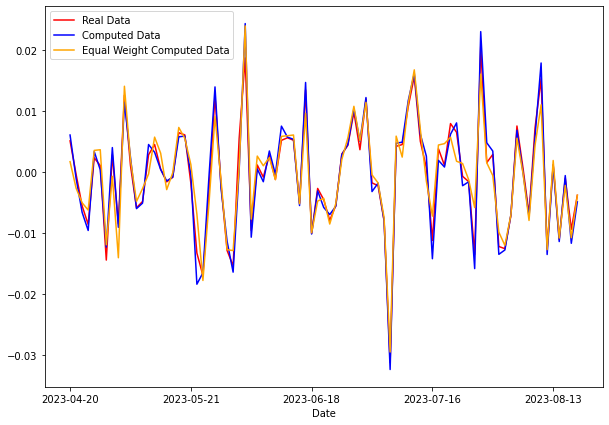

In [77]:
plt.figure(figsize=(10, 7))
data_bench.plot(color="red", label="Real Data")
bench_returns_computed.plot(color="blue", label="Computed Data")
fund_returns_computed.plot(color="orange", label="Equal Weight Computed Data")
plt.legend()

Il semble que j'ai les bonnes pondérations avec quelques ecarts malheureusement surement dû à des infimes différences en valeur exacte. D'ailleurs la somme des pondérations n'est pas exactement égale à 1 mais on a du résiduel à $10^-4$. Je me suis sourcé auprès [ABC Bourse](https://www.abcbourse.com/marches/ponderation_cac40) pour les pondérations.

### Minimisation de la tracking error sous contrainte de rentabilité anticipée

In [93]:
np.array(bench_returns.mean())

array([-2.58868352e-04, -7.37191678e-05, -5.57057510e-05,  4.20656171e-07,
       -1.64547758e-05, -7.26159681e-06,  8.12800401e-06, -2.02837996e-06,
       -9.86296275e-07, -3.47437094e-07, -2.09399322e-05,  3.00571069e-06,
       -4.35699890e-05, -2.48218871e-05,  8.00128500e-06, -2.17306706e-05,
       -7.08223492e-06, -1.17199236e-06, -2.01884152e-05, -8.85240462e-06,
        7.52143714e-06,  2.23816561e-05,  1.99151110e-06, -1.22903433e-05,
       -1.47072694e-05, -1.41783294e-05,  7.16979156e-06,  1.40266099e-05,
        1.08994824e-06, -4.71711571e-06, -5.50392614e-06, -1.49919720e-06,
       -1.00542976e-06, -2.15498148e-06,  5.15708182e-06, -5.27994474e-06,
        7.16026757e-06, -9.21334219e-06, -1.98925730e-05, -7.52585683e-07])

In [131]:
G = 0.002 #bps au dessus au quotidien

#Fonction objectif
P = np.asmatrix(np.cov(bench_returns))
Q = - np.asmatrix(cac_40_weights) @ np.asmatrix(np.cov(bench_returns))

#Contraintes
shape = (len(bench_returns), 1)
sc_ineq = -np.ones(shape)
h_ineq = np.zeros(shape)
h_eq = np.array([1, G - np.array(cac_40_weights) @ np.array(bench_returns.mean())])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 85 is different from 1)

/Users/ayoub/opt/anaconda3/lib/python3.8/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


(1, 2)

<u> Quelques notations </u>

$w_p$ : vecteur des poids des actifs financiers du portefeuille géré

$w_b$: vecteur des poids des actifs financiers contenus dans l'indice

$ x = w_p - w_b $ : vecteur de la différence des poids par actifs

$R_b = w_b \bar{R}$ : vecteur de la rentabilité espérée du benchmark

$ \sigma^2_b = w_b^T V w_b $ : variance de la rentabilité du benchmark

$ T = \sqrt{x^T V x} $: volatilité du tracking error

La gestion benchmarkée n'est pas une approche absolue au sens de Markowitz, le gerant est contraint de ne pas trop s'eloigner de l'allocation prédéfinie de l'indice tout en minimisant la variance de son tracking error. Ainsi, en présence d'un benchmark, le problème d'optimisation auquel le gérant se confronte pour déterminer l'allocation optimale devient:

$$
Min \; \; (w_p - w_b)^T V (w_p - w_b) \; \; \Leftrightarrow \; \; 2 \cdot Min \; \; (\frac{1}{2} \cdot w_p^T V w_p -(V w_b)^T w_p + 2 \cdot w_b^T V w_b) \\
sc: \quad w_p^T e = 1 \\
\qquad \; (w_p - w_b) \cdot R_b = G \; \\
\; \text{avec, G l'excès de rentabilité anticipée du fonds par rapport au benchmark}
$$

Ce programme d'optimisation a été résolu par Roll en 1992 et sa forme est la suivante:

$$
w_p = w_b + D \cdot (w_1 - w_2) \\
\text{avec,} \; D = \frac{G}{R_1 - R_0}
$$

In [78]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / np.sum(k)

In [79]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [80]:
n_portfolios = 10000
means, stds = np.column_stack([
    random_portfolio(tickers_returns) 
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

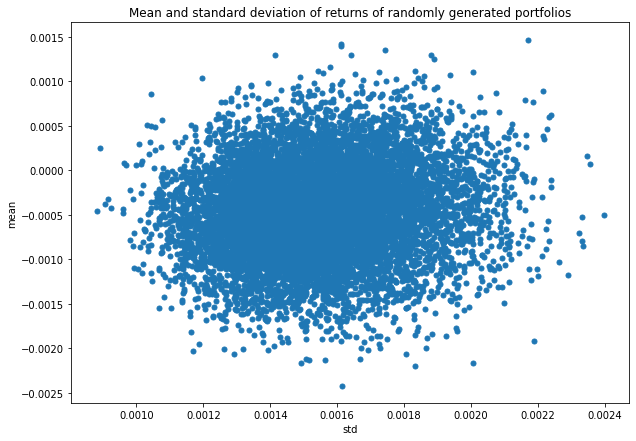

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

In [ ]:
P = matrix()

In [52]:
a = np.asmatrix([1, 2])
V = np.asmatrix([[0, 2], [2, 7]])
b = np.asmatrix([3, 9])

In [53]:
a * V * b.T

matrix([[156]])

In [54]:
b * V * a.T

matrix([[156]])

In [55]:
V

matrix([[0, 2],
        [2, 7]])